### **Predition of percentage of an student based on the no. of study hours**

### **Simple Linear Regression**

### Importing the packages

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Reading of Data

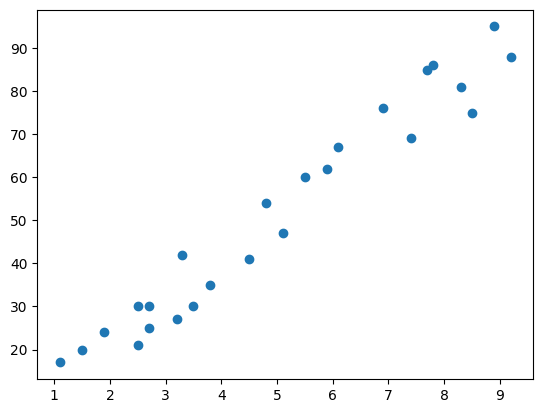

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
x_d=data["Hours"]
y_d=data["Scores"]
x=np.array(x_d)
y=np.array(y_d)
plt.scatter(x,y)
plt.show()

### Cost function

In [3]:
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

### Gradient Descent

In [4]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [5]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

### Training

In [6]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x ,y, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.61e+02  dj_dw: -3.179e+02, dj_db: -5.148e+01   w:  3.179e+00, b: 5.14800e-01
Iteration 1000: Cost 1.44e+01  dj_dw:  4.023e-03, dj_db: -2.492e-02   w:  9.797e+00, b: 2.35343e+00
Iteration 2000: Cost 1.44e+01  dj_dw:  5.947e-04, dj_db: -3.684e-03   w:  9.779e+00, b: 2.46442e+00
Iteration 3000: Cost 1.44e+01  dj_dw:  8.792e-05, dj_db: -5.447e-04   w:  9.776e+00, b: 2.48083e+00
Iteration 4000: Cost 1.44e+01  dj_dw:  1.300e-05, dj_db: -8.052e-05   w:  9.776e+00, b: 2.48325e+00
Iteration 5000: Cost 1.44e+01  dj_dw:  1.922e-06, dj_db: -1.190e-05   w:  9.776e+00, b: 2.48361e+00
Iteration 6000: Cost 1.44e+01  dj_dw:  2.841e-07, dj_db: -1.760e-06   w:  9.776e+00, b: 2.48366e+00
Iteration 7000: Cost 1.44e+01  dj_dw:  4.199e-08, dj_db: -2.602e-07   w:  9.776e+00, b: 2.48367e+00
Iteration 8000: Cost 1.44e+01  dj_dw:  6.208e-09, dj_db: -3.846e-08   w:  9.776e+00, b: 2.48367e+00
Iteration 9000: Cost 1.44e+01  dj_dw:  9.178e-10, dj_db: -5.686e-09   w:  9.776e+00, b: 2.48367e+00


### Predicting

In [7]:
print(f"{w_final*9.25 + b_final:0.1f}")

92.9


In [8]:
x_test = np.array([1.5,3.2,7.4,2.5,5.9])
y_test = np.array([20,27,69,30,60])
y_pred = w_final * x_test + b_final
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,60,60.160913


### Evaluation of model

In [9]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.7362431589391676
